# HEP Plotter Gallery (1D Data/MC)
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter for plots comparing data and prediction, referred to as 'data/mc' plots.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

First, ensure the environment has the proper path for this setup.   Nominally this would be used inside a CMSSW environment, so the import statements will vary.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("/hepPlotter/examples")
if hpd not in sys.path:
    sys.path.insert(0,hpd)
    print("Added {0} to path!".format(hpd))
else:
    print("Already exists in path!")

Added /Users/demarley/Desktop/CERN/CMS/common to path!


In [3]:
from hepPlotter.histogram1D import Histogram1D
import hepPlotter.tools as tools

%matplotlib inline

Welcome to JupyROOT 6.10/02


/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


We will now load toy data (example.root) and show a basic data/mc plot that you can make using this framework.

In [4]:
import ROOT
# uproot integration is on-going

In [5]:
f = ROOT.TFile.Open("example.root")

In [6]:
gauss   = f.Get("gauss")   # standard ROOT histogram (TH1D)
poisson = f.Get("poisson") # standard ROOT histogram (TH1D)

#### Data/MC Plots

We will compare our prediction ("MC") with Data using the ratio plot capabilities of the hepPlotter framework.

_NB: An separate hepPlotterDataMC class is under development. In the meantime, simple data/mc plots can be made using the Histogram1D class_

In [7]:
# Set total total MC to be the sum of `gauss` and `poisson`
# Here we are assuming 'gauss' and 'poisson' are the background samples
totalMC = gauss.Clone()
_ = totalMC.Add(poisson)

In [8]:
# Do some sampling of the total MC value to generate pseudo-data
# for this example
import numpy as np
mu    = 1
sigma = 0.2
data  = totalMC.Clone()

for b in range(data.GetNbinsX()):
    content = int( np.random.normal(mu,sigma) * data.GetBinContent(b+1) )
    data.SetBinContent(b+1,content)
    data.SetBinError(b+1,np.sqrt(content))

Now plot the MC prediction (gauss+poisson) with the 'data'

/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:220: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.content = (num_data / den_data).copy()
/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:221: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.error   = (numerator.data.error / den_data).copy()
/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


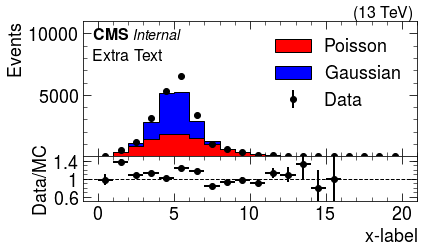

In [9]:
# Setup the plot
hist = Histogram1D()

hist.normed  = False
hist.stacked = True
hist.axis_scale['y'] = 1.0 # adjust the vertical scale of the plot
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist_datamc_jupyter_example"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Internal"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Extra Text",coords=[0.03,0.80])

# Ratio plot -- see `HepPlotterRatio()` for all options
hist.ratio.value  = "ratio"
hist.ratio.ylabel = "Data/MC"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='stepfilled',color='red',lw=1,
         edgecolor="k",label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',lw=1,
         edgecolor="k",label="Gaussian")

# Add total MC as dummy data (stacked gauss & poisson contributions)
hist.Add(totalMC,name="totalMC",
         draw_type='step',lw=0,alpha=0,
         edgecolor="k",label=None)

# Add data (defined above) -- here we're using the same as total MC
hist.Add(data,name="data",
         draw_type='errorbar',label="Data")

# Add ratio plot -- modify some options to test the results
# NB: To switch plotting styles, use the keyword 'draw_type' just as in `hist.Add(...)`
hist.ratio.Add(numerator='data',denominator='totalMC',draw_type='errorbar')

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it